### Mohamed Muad Mafaz
### COADDS 202P-009

## Data Analysis

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
%matplotlib inline
#%matplotlib notebook

In [2]:
#Loading the data set
vehicle_data = pd.read_csv(r"C:\Users\acer\Downloads\vehicle_data.csv", low_memory=False)
vehicle_data.head()

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo","Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km","Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2022-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha","Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km","Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2022-09-30 21:50:00


In [3]:
vehicle_data.shape

(123971, 19)

In [4]:
vehicle_data.dtypes

Title             object
Sub_title         object
Price             object
Brand             object
Model             object
Edition           object
Year               int64
Condition         object
Transmission      object
Body              object
Fuel              object
Capacity          object
Mileage           object
Location          object
Description       object
Post_URL          object
Seller_name       object
Seller_type       object
published_date    object
dtype: object

In [5]:
vehicle_data.isnull().sum()

Title                 0
Sub_title             0
Price                 0
Brand                 0
Model                 1
Edition           76433
Year                  0
Condition             0
Transmission          1
Body               5095
Fuel                  0
Capacity            205
Mileage               0
Location              0
Description       16174
Post_URL              0
Seller_name          98
Seller_type           0
published_date        0
dtype: int64

In [6]:
#Filling Null values with mode as it has a large number of records
vehicle_data['Edition'].fillna(vehicle_data['Edition'].mode()[0], inplace = True)
vehicle_data['Body'].fillna(vehicle_data['Body'].mode()[0], inplace = True)
vehicle_data['Capacity'].fillna(vehicle_data['Capacity'].mode()[0], inplace = True)
vehicle_data['Description'].fillna(vehicle_data['Description'].mode()[0], inplace = True)
vehicle_data['Transmission'].fillna(vehicle_data['Transmission'].mode()[0], inplace = True)

#Dropping Null values as it has only a fewer number records which will not make any difference
vehicle_data = vehicle_data[vehicle_data['Model'].notna()]
vehicle_data = vehicle_data[vehicle_data['Transmission'].notna()]
vehicle_data = vehicle_data[vehicle_data['Seller_name'].notna()]

In [7]:
vehicle_data.isnull().sum()

Title             0
Sub_title         0
Price             0
Brand             0
Model             0
Edition           0
Year              0
Condition         0
Transmission      0
Body              0
Fuel              0
Capacity          0
Mileage           0
Location          0
Description       0
Post_URL          0
Seller_name       0
Seller_type       0
published_date    0
dtype: int64

**Convert type of Price to float**

In [8]:
#Renaming the column name Price
vehicle_data.rename({"Price":"Price (Rs)"}, axis = 1, inplace = True)

In [12]:
#Removing the word Negotiable to cast the string to float
vehicle_data.drop(vehicle_data[vehicle_data['Price (Rs)'] == 'Negotiable'].index, inplace = True)

In [13]:
#removing spaces,commas,Rs to convert string to float
vehicle_data['Price (Rs)'] = vehicle_data['Price (Rs)'].str.replace('Rs', '').str.replace(',', '').str.replace('.', '').str.strip();

C:\Users\acer\AppData\Local\Temp\ipykernel_12776\3656911984.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  vehicle_data['Price (Rs)'] = vehicle_data['Price (Rs)'].str.replace('Rs', '').str.replace(',', '').str.replace('.', '').str.strip();


In [14]:
vehicle_data['Price (Rs)'] = vehicle_data['Price (Rs)'].astype(float)

**Convert type of Capacity to Int**

In [15]:
#Renaming
vehicle_data.rename({"Capacity" : "Capacity(cc)"}, axis = 1, inplace = True)

In [16]:
#Dropping values that are not applicable
vehicle_data.drop(vehicle_data[vehicle_data['Capacity(cc)'] == vehicle_data['Capacity(cc)'].str.startswith('-')].index, inplace = True)
vehicle_data.drop(vehicle_data[vehicle_data['Capacity(cc)'] == '-'].index, inplace = True)
vehicle_data.drop(vehicle_data[vehicle_data['Capacity(cc)'] == 'Manual'].index, inplace = True)
vehicle_data.drop(vehicle_data[vehicle_data['Capacity(cc)'] == 'Automatic'].index, inplace = True)

In [17]:
vehicle_data.drop(vehicle_data[vehicle_data['Year'] == 0].index, inplace = True)
vehicle_data.drop(vehicle_data[vehicle_data['Year'] >= 2022].index, inplace = True)

In [18]:
#Converting Capacity to Integer
vehicle_data['Capacity(cc)'] = vehicle_data['Capacity(cc)'].str.replace('cc', '').str.replace(',', '').str.replace('.', '').str.strip().astype('int64');

C:\Users\acer\AppData\Local\Temp\ipykernel_12776\3352222487.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  vehicle_data['Capacity(cc)'] = vehicle_data['Capacity(cc)'].str.replace('cc', '').str.replace(',', '').str.replace('.', '').str.strip().astype('int64');


**Convert type of Capacity to Int**

In [19]:
#Renaming
vehicle_data.rename({"Mileage" : "Mileage(km)"}, axis = 1, inplace = True)

In [20]:
vehicle_data.drop(vehicle_data[vehicle_data['Mileage(km)'] == '-'].index, inplace = True)

In [21]:
#Converting Mileage to Integer
vehicle_data['Mileage(km)'] = vehicle_data['Mileage(km)'].str.replace('km', '').str.replace(',', '').astype('int64')

In [22]:
#Changing the values of column Title
vehicle_data['Title'] = vehicle_data['Brand'] + " "+ vehicle_data['Model']

In [23]:
#Conveting type of Published_date to datetime
vehicle_data['published_date'] = pd.to_datetime(vehicle_data['published_date'])

In [24]:
vehicle_data.drop(["Sub_title",'Description'], axis = 1, inplace = True)

In [25]:
vehicle_data.shape

(110627, 17)

In [26]:
vehicle_data.describe()

,Price (Rs),Year,Capacity(cc),Mileage(km)
count,1.106270e+05,110627.000000,1.106270e+05,1.106270e+05
mean,6.794917e+06,2009.096197,1.756085e+04,3.392546e+05
std,1.063360e+07,10.408531,2.836611e+06,1.920085e+07
min,8.500000e+01,1900.000000,-2.200000e+03,0.000000e+00
25%,1.500000e+06,2005.000000,6.600000e+02,3.700000e+04
50%,4.350000e+06,2013.000000,1.300000e+03,7.200000e+04
75%,7.800000e+06,2016.000000,1.600000e+03,1.230000e+05
max,7.750256e+08,2021.000000,7.010178e+08,4.596363e+09


,Price (Rs),Year,Capacity(cc),Mileage(km)
Price (Rs),1.000000,0.261665,-0.003047,0.019401
Year,0.261665,1.000000,0.000992,-0.013091
Capacity(cc),-0.003047,0.000992,1.000000,0.069222
Mileage(km),0.019401,-0.013091,0.069222,1.000000


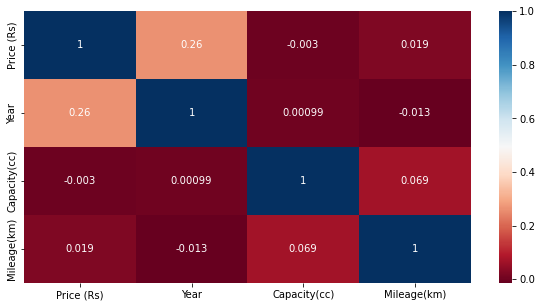

In [27]:
plt.figure(figsize=(10,5))
v= vehicle_data.corr()
sns.heatmap(v,cmap="RdBu",annot=True)
v

## Data Visualizaton

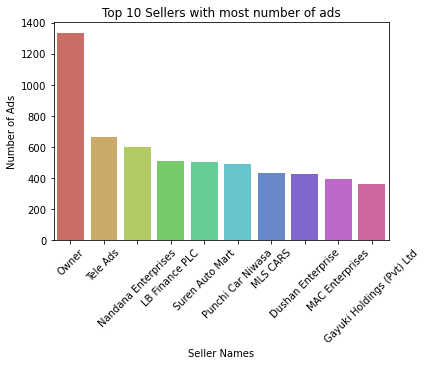

In [28]:
## Top 5 sellers

top_10_seller = vehicle_data[["Title", "Seller_name"]].groupby("Seller_name").agg(['count'])['Title']['count'].sort_values(ascending=False)[:10]
fig = sns.barplot( x = top_10_seller.index, y = top_10_seller.values, color = 'blue', palette = 'hls')
fig.set_xticklabels(labels=top_10_seller.index , rotation=45)
fig.set_ylabel("Number of Ads")
fig.set_xlabel("Seller Names")
fig.set_title("Top 10 Sellers with most number of ads");

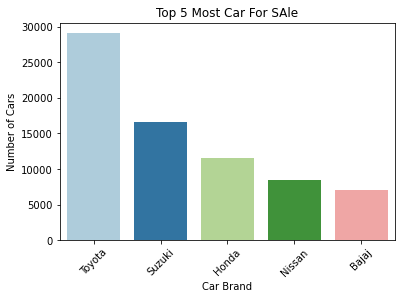

In [29]:
#Top 5 cars for sale
top_5_car_brand = vehicle_data[["Title", "Brand"]].groupby("Brand").agg(['count'])['Title']['count'].sort_values(ascending=False)[:5]
fig = sns.barplot( x = top_5_car_brand.index, y = top_5_car_brand.values, color = 'blue', palette = 'Paired')
fig.set_xticklabels(labels=top_5_car_brand.index , rotation=45)
fig.set_ylabel("Number of Cars")
fig.set_xlabel("Car Brand")
fig.set_title("Top 5 Most Car For SAle");

In [30]:
vehicle_data['Year'] = pd.to_datetime(vehicle_data['Year'].astype(str)).values
df = vehicle_data[["Year", "Price (Rs)"]].groupby('Year').agg({"Price (Rs)":"mean"})

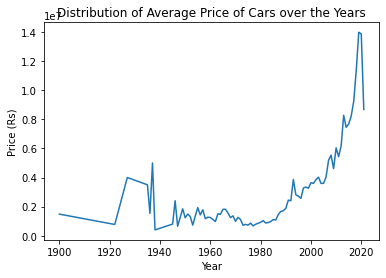

In [31]:
sns.lineplot(data=df, x="Year", y="Price (Rs)").set(title="Distribution of Average Price of Cars over the Years");

In [32]:
df_2 = pd.DataFrame(vehicle_data.groupby("Condition")\
                          ["Title"].count()).reset_index().rename({"Condition":"Condition"},axis=1);

In [33]:
df_2.drop(df_2[df_2['Condition'] == 'e'].index, inplace = True)
df_3 = df_2.replace('Recondition','Reconditioned')
df_4 = pd.DataFrame(df_3.groupby("Condition")\
                          ["Title"].sum()).reset_index().rename({"Condition":"Condition"},axis=1);
df_4

,Condition,Title
0,New,602
1,Reconditioned,2142
2,Used,107675


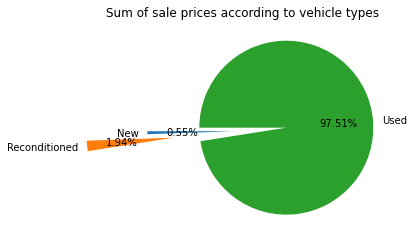

In [34]:
y = df_4["Title"]
lbl = df_4["Condition"]
epld = [0.1,0.8,0.5]
plt.pie(y, labels=lbl, startangle = 180, explode = epld, autopct='%1.2f%%')
plt.title("Sum of sale prices according to vehicle types")
plt.show();

In [35]:
df_5 = pd.DataFrame(vehicle_data.groupby("Fuel")\
                          ["Title"].count()).reset_index().rename({"Condition":"Condition"},axis=1);
df_6 = df_5.loc[df_5['Fuel'].isin(['Diesel','Hybrid','Petrol'])]
df_6

,Fuel,Title
1,Diesel,18080
4,Hybrid,13264
8,Petrol,78702


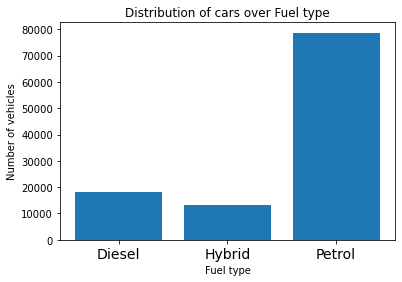

In [36]:
x = df_6["Fuel"]
y = df_6["Title"]

plt.bar(x,y)
plt.title("Distribution of cars over Fuel type")
plt.xlabel("Fuel type")
plt.ylabel("Number of vehicles")
plt.xticks(fontsize=14)
plt.show();

## Model Building

### Linear Regression

In [37]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [38]:
df0 = vehicle_data

In [39]:
df = df0.sample(frac=0.1)

In [40]:
def outlier_detection(colname):
  upper_limit = df[colname].mean() + 3*df[colname].std()
  lower_limit = df[colname].mean() - 3*df[colname].std()
  return upper_limit, lower_limit

In [41]:
df.dtypes

Title                     object
Price (Rs)               float64
Brand                     object
Model                     object
Edition                   object
Year              datetime64[ns]
Condition                 object
Transmission              object
Body                      object
Fuel                      object
Capacity(cc)               int64
Mileage(km)                int64
Location                  object
Post_URL                  object
Seller_name               object
Seller_type               object
published_date    datetime64[ns]
dtype: object

In [42]:
cleaned_df = df[(df["Price (Rs)"] > outlier_detection("Price (Rs)")[1]) & (df["Price (Rs)"] < outlier_detection("Price (Rs)")[0])]
cleaned_df = df[(df["Capacity(cc)"] > outlier_detection("Capacity(cc)")[1]) & (df["Capacity(cc)"] < outlier_detection("Capacity(cc)")[0])]
cleaned_df = df[(df["Mileage(km)"] > outlier_detection("Mileage(km)")[1]) & (df["Mileage(km)"] < outlier_detection("Mileage(km)")[0])]

In [43]:
COLS_NEEDED = ["Title", "Condition", "Seller_name", "Price (Rs)", "Capacity(cc)", "Mileage(km)",
               "Transmission", "Seller_type"]
df1 = cleaned_df[COLS_NEEDED]

In [44]:
COLS_TO_ONE_HOT = ["Title", "Condition", "Seller_name", 'Transmission']
df2 = df1[COLS_TO_ONE_HOT]

In [46]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
ohe_values = ohe.fit_transform(df2).toarray()
ohe_columns = ohe.get_feature_names_out()
df4 = pd.DataFrame(ohe_values, columns=ohe_columns)

In [48]:
df4.head()

,Title_Acura Alto,Title_Acura Aqua G Limited,Title_Alfa Romeo Other Model,Title_Aprilia SR 125,Title_Aprilia SR 150,Title_Ashok-Leyland 1613,Title_Ashok-Leyland 1616,Title_Ashok-Leyland 1616 IL,Title_Ashok-Leyland Bowser,Title_Ashok-Leyland Cargo 1613,...,Seller_name_ගාමිණී,Seller_name_රාජපක්ෂ,Seller_name_සජීව,Seller_name_සුගුණ දස්සි හ,Transmission_1200,Transmission_175,Transmission_Automatic,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
df1.head()

,Title,Condition,Seller_name,Price (Rs),Capacity(cc),Mileage(km),Transmission,Seller_type
101824,Toyota Premio G Superior,Used,Jayantha,9400000.0,1500,88974,Automatic,Member
52005,Suzuki Wagon R,Used,Biyanka Perera,3150000.0,1100,50900,Manual,Premium-Member
82024,Toyota LAND CRUISER PRADO,Used,NALIN AUTO ENTERPRISES,24500000.0,2700,135000,Automatic,Member
115299,TVS NTORQ 125,Used,Fadhir,180000.0,125,15000,Automatic,Member
19557,Suzuki Wagon R FZ,Used,K-Auto Mart,5990000.0,660,59800,Automatic,Premium-Member


In [50]:
df1[["Capacity(cc)","Mileage(km)"]]

,Capacity(cc),Mileage(km)
101824,1500,88974
52005,1100,50900
82024,2700,135000
115299,125,15000
19557,660,59800
...,...,...
80640,1500,149000
14078,1000,40000
44460,1000,8837
12314,1340,268000


In [51]:
from sklearn.preprocessing import Normalizer

In [52]:
norm = Normalizer()

In [53]:
norm_values = norm.fit_transform(df[["Capacity(cc)", "Mileage(km)"]])
norm_cols = ["norm_Capacity(cc)", "norm_Mileage(km)"]

In [54]:
df5 = pd.DataFrame(norm_values, columns=norm_cols)

In [55]:
df5.head()

,norm_Capacity(cc),norm_Mileage(km)
0,0.016856,0.999858
1,0.021606,0.999767
2,0.019996,0.999800
3,0.008333,0.999965
4,0.011036,0.999939


In [65]:
final_df = pd.concat([df4, df5], axis=1)

In [61]:
X = final_df
y = df1["Price (Rs)"].fillna(value=np.mean(df1["Price (Rs)"]))

In [66]:
X.drop(X.tail(10).index,
        inplace = True)

In [67]:
X.shape

(11053, 7767)

In [68]:
y.shape

(11053,)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
pred_values = lin_reg.predict(X_test)

In [70]:
final_df.columns

Index(['Title_Acura Alto', 'Title_Acura Aqua G Limited',
       'Title_Alfa Romeo Other Model', 'Title_Aprilia SR 125',
       'Title_Aprilia SR 150', 'Title_Ashok-Leyland 1613',
       'Title_Ashok-Leyland 1616', 'Title_Ashok-Leyland 1616 IL',
       'Title_Ashok-Leyland Bowser', 'Title_Ashok-Leyland Cargo 1613',
       ...
       'Seller_name_සජීව', 'Seller_name_සුගුණ දස්සි හ', 'Transmission_1200',
       'Transmission_175', 'Transmission_Automatic', 'Transmission_Manual',
       'Transmission_Other transmission', 'Transmission_Tiptronic',
       'norm_Capacity(cc)', 'norm_Mileage(km)'],
      dtype='object', length=7767)

In [71]:
mean_squared_error(y_test, pred_values)

1.1873796776373873e+37

In [72]:
final_df.shape

(11063, 7767)

In [73]:
def final_model(model):
  model = model()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error_term = mean_squared_error(y_test, pred_values)
  print("Error: ", error_term)

In [74]:
final_model(LinearRegression)

Error:  1.1873796776373873e+37
